In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import numpy as np

#Читаем файл данных 
data = pd.read_csv('D:/Develop/MachineLearning/DataSets/DataSet11_2.csv', delimiter=";", encoding="ISO-8859-1")
data1 = data.iloc[:,[0,1,4,5,9,10,17,-1]]
data1 = data1.head(2000)
data1.head()



,ID_CLIENT,ID_SHOP,AGE,QUANT_DEPENDANTS,PAYMENT_DAY,SHOP_RANK,MONTHS_IN_THE_JOB,TARGET_LABEL_BAD=1
0,2,15,18,0,20,0,12,0.0
1,4,12,47,0,25,0,24,0.0
2,5,16,28,0,25,0,12,0.0
3,6,24,26,0,28,0,0,0.0
4,7,55,22,0,12,0,48,0.0


In [37]:
# Шаг 2: Разделение данных
X = data1.drop("TARGET_LABEL_BAD=1", axis=1)  # признаки
y = data1["TARGET_LABEL_BAD=1"]  # целевая переменная
y = y.dropna()

# Шаг 2: Удаление пропущенных значений
y = y.dropna()
X = X.iloc[y.index]  # соответствующие строки в X

# Ось X (False Positive Rate): Это доля ложноположительных результатов от 
# общего числа отрицательных примеров. Формула: FPR = FP / (FP + TN).
# Ось Y (True Positive Rate): Это доля истинноположительных результатов от 
# общего числа положительных примеров. Формула: TPR = TP / (TP + FN).


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = SVC(kernel = 'poly', probability = True)
model.fit(X_train, y_train)
y_pred_SVM = model.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, y_pred_SVM) 
print('auc_roc', res)


auc_roc 0.4890192217132583


In [39]:
modelKn = KNeighborsClassifier(n_neighbors = 3)
modelKn.fit(X_train, y_train)
y_pred_kNN = modelKn.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, y_pred_kNN) 
print('auc_roc', res)

auc_roc 0.5006635558029024


In [40]:
modelGs = GaussianNB()
modelGs.fit(X_train, y_train)
y_pred_NB = modelGs.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, y_pred_NB) 
print('auc_roc', res)

auc_roc 0.6586754569973029


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, y_pred_rf) 
print('auc_roc', res)

auc_roc 0.5526349586882999


In [42]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_lr = logreg_model.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, y_pred_lr) 
print('auc_roc', res)

auc_roc 0.6427929277794426


In [43]:
# Шаг 4: Оценка качества моделей
models = [model, modelKn, modelGs, rf_model, logreg_model]
model_names = ['k-NN', 'SVM', 'Naive Bayes', 'RandomForest', 'logreg_model']

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # вероятности для ROC-AUC

    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


k-NN Results:
Accuracy: 0.8225
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.4890192217132583

SVM Results:
Accuracy: 0.7575
Precision: 0.20454545454545456
Recall: 0.1267605633802817
F1 Score: 0.1565217391304348
ROC-AUC Score: 0.5006635558029024

Naive Bayes Results:
Accuracy: 0.8175
Precision: 0.3333333333333333
Recall: 0.028169014084507043
F1 Score: 0.05194805194805195
ROC-AUC Score: 0.6586754569973029

RandomForest Results:
Accuracy: 0.7975
Precision: 0.14285714285714285
Recall: 0.028169014084507043
F1 Score: 0.047058823529411764
ROC-AUC Score: 0.5526349586882999

logreg_model Results:
Accuracy: 0.8225
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.6427929277794426


C:\Users\opawk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\opawk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


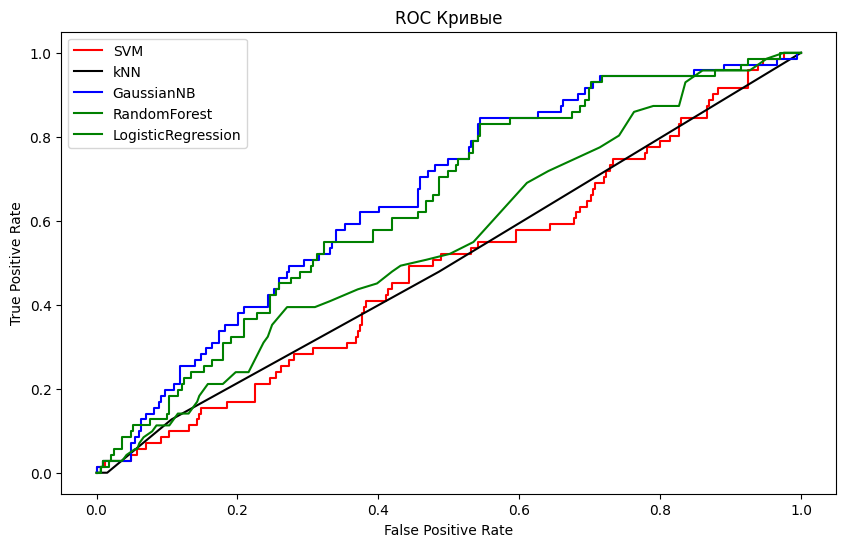

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_SVM)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_kNN)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_NB)
fpr_c4, tpr_c4, _ = roc_curve(y_test, y_pred_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr_svm,tpr_svm, color='red', linestyle = 'solid', label = 'SVM')
ax.plot(fpr_knn,tpr_knn, color='black', linestyle = 'solid', label = 'kNN')
ax.plot(fpr_nb,tpr_nb, color='blue', linestyle = 'solid', label = 'GaussianNB')
ax.plot(fpr_c4,tpr_c4, color='green', linestyle = 'solid', label = 'RandomForest')
ax.plot(fpr_lr,tpr_lr, color='green', linestyle = 'solid', label = 'LogisticRegression')
ax.set(title="ROC Кривые", xlabel="False Positive Rate", ylabel="True Positive Rate")
ax.legend()
plt.show()

## Кроссвалидация

In [47]:
# Кроссвалидация
from sklearn.model_selection import cross_validate
import numpy as np

model = SVC(kernel = 'poly', probability = True)
cv_SVC = cross_validate(model, X_train, y_train, cv=3, return_estimator=True)
best_SVC = cv_SVC['estimator'][np.where(cv_SVC['test_score'] == max(cv_SVC['test_score']))[0][0]]
res_SVC = best_SVC.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, res_SVC)
print('auc_roc', res)

auc_roc 0.5004066954921016


In [48]:
model = KNeighborsClassifier(n_neighbors = 3)
cv_kNN = cross_validate(model, X_train, y_train, cv=3, return_estimator=True)
best_kNN = cv_kNN['estimator'][np.where(cv_kNN['test_score'] == max(cv_kNN['test_score']))[0][0]]
res_kNN = best_kNN.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, res_kNN)
print('auc_roc', res)

auc_roc 0.4959544501048847


In [49]:
model = GaussianNB()
cv_NB= cross_validate(model, X_train, y_train, cv=3, return_estimator=True)
best_NB = cv_NB['estimator'][np.where(cv_NB['test_score'] == max(cv_NB['test_score']))[0][0]]
res_NB = best_NB.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, res_NB)
print('auc_roc', res)

auc_roc 0.6551436277237895


In [50]:
model = LogisticRegression()
cv_LR= cross_validate(model, X_train, y_train, cv=3, return_estimator=True)
best_LR = cv_LR['estimator'][np.where(cv_LR['test_score'] == max(cv_LR['test_score']))[0][0]]
res_LR = best_LR.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, res_LR)
print('auc_roc', res)

auc_roc 0.6522539492272785


In [51]:
model = RandomForestClassifier()
cv_RF= cross_validate(model, X_train, y_train, cv=3, return_estimator=True)
best_RF = cv_RF['estimator'][np.where(cv_RF['test_score'] == max(cv_RF['test_score']))[0][0]]
res_RF = best_RF.predict_proba(X_test)[:, 1]
res = roc_auc_score(y_test, res_RF)
print('auc_roc', res)

auc_roc 0.5404340939252537


In [52]:
print(f'Логистическая регрессия {cv_LR}')
print(f'Naive Bayes {cv_NB}')


Логистическая регрессия {'fit_time': array([0.0166328 , 0.01153445, 0.01599407]), 'score_time': array([0.00201368, 0.00200558, 0.00199914]), 'estimator': [LogisticRegression(), LogisticRegression(), LogisticRegression()], 'test_score': array([0.79213483, 0.79362101, 0.79362101])}
Naive Bayes {'fit_time': array([0.00516319, 0.00299239, 0.00299811]), 'score_time': array([0.00302005, 0.00400233, 0.00300455]), 'estimator': [GaussianNB(), GaussianNB(), GaussianNB()], 'test_score': array([0.77715356, 0.76547842, 0.78986867])}


## Композиции

In [55]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('NB', best_NB), ('LR',best_LR), ('RF', best_RF)], voting='hard')
eclf.fit(X_train, y_train)
res_eclf = eclf.predict(X_test)

print('auc_roc', roc_auc_score(y_test, res_eclf))

auc_roc 0.49848024316109424


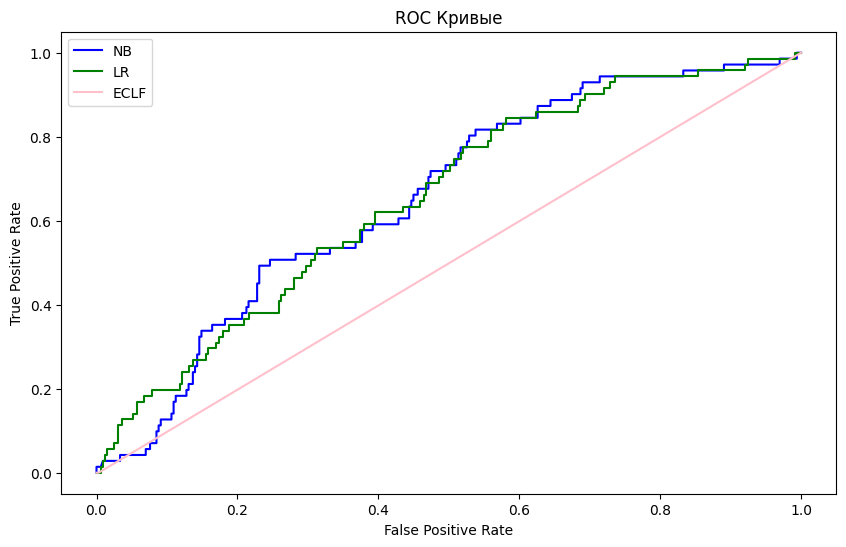

In [56]:
fpr_nb, tpr_nb, _ = roc_curve(y_test, res_NB)
fpr_c4, tpr_c4, _ = roc_curve(y_test, res_LR)
fpr_eclf, tpr_eclf, _ = roc_curve(y_test, res_eclf)


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(fpr_nb,tpr_nb, color='blue', linestyle = 'solid', label = 'NB')
ax.plot(fpr_c4,tpr_c4, color='green', linestyle = 'solid', label = 'LR')
ax.plot(fpr_eclf,tpr_eclf, color='pink', linestyle = 'solid', label = 'ECLF')

ax.set(title="ROC Кривые", xlabel="False Positive Rate", ylabel="True Positive Rate")
ax.legend()
plt.show()